*Import Libraries*

In [176]:
# Import necessary libraries and components

# NumPy is a powerful library for numerical operations in Python
import numpy as np

# Matplotlib is a plotting library for creating visualizations in Python
import matplotlib.pyplot as plt

# OpenCV (cv2) is a computer vision library for image and video processing
import cv2

# TensorFlow is an open-source machine learning framework
import tensorflow as tf

# From TensorFlow, import specific metrics useful for binary classification tasks
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


*Importing data*

In [177]:
#size
batch_size = 32
img_height = 150
img_width = 150

In [178]:
#loading data
train=tf.keras.utils.image_dataset_from_directory('/Users/divyanshusrivastava/Downloads/ree/data/',image_size=(img_height,img_width),
                                                validation_split=0.1,
                                            subset='training',seed=123)
val=tf.keras.utils.image_dataset_from_directory('/Users/divyanshusrivastava/Downloads/ree/data/',image_size=(img_height,img_width),
                                                validation_split=0.2,
                                                subset='validation',seed=123)
test=tf.keras.utils.image_dataset_from_directory('/Users/divyanshusrivastava/Downloads/ree/data/',image_size=(img_height,img_width),
                                                validation_split=0.1,
                                                subset='validation',seed=123)

Found 6098 files belonging to 2 classes.
Using 5489 files for training.
Found 6098 files belonging to 2 classes.
Using 1219 files for validation.
Found 6098 files belonging to 2 classes.
Using 609 files for validation.


In [179]:
#classes
label_to_class_name = dict(zip(range(len(train.class_names)), train.class_names))
label_to_class_name

{0: 'not_resume', 1: 'resume'}

In [180]:
#image shape
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32,)


*Ploting Image*

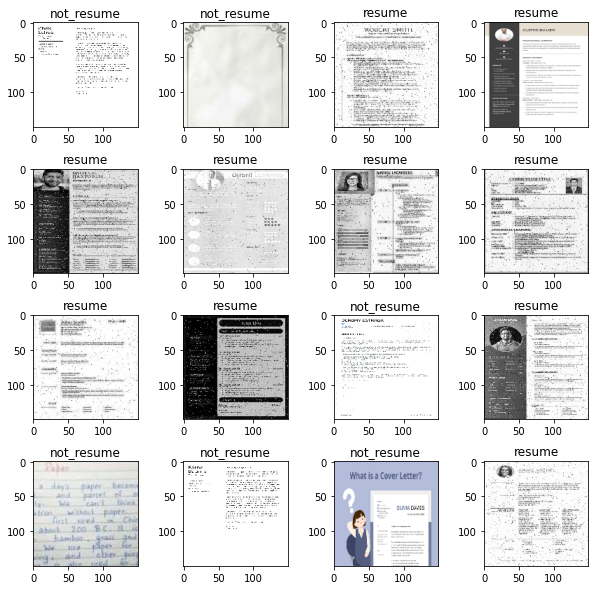

In [181]:
data_iterator = train.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i in range(4):  
    for j in range(4):  
        index = i * 4 + j  
        ax[i, j].imshow(batch[0][index].astype(int))
        ax[i, j].set_title(label_to_class_name[batch[1][index]])
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

*Preprocessing*

In [182]:
#scaling
train=train.map(lambda x,y:(x/255,y))
val=val.map(lambda x,y:(x/255,y))

In [183]:
#optimizing the performance 
AUTOTUNE = tf.data.AUTOTUNE

train = train.cache().prefetch(buffer_size=AUTOTUNE)
val = val.cache().prefetch(buffer_size=AUTOTUNE)
test = test.cache().prefetch(buffer_size=AUTOTUNE)

*Training Model*

In [184]:

# Define a sequential model
model = tf.keras.Sequential([
    # Convolutional layer with 32 filters, each of size (3, 3), using ReLU activation,
    # and input shape of (150, 150, 3) indicating height, width, and channels (RGB)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)), 
    
    # Max pooling layer with pool size (2, 2), which reduces the spatial dimensions by half
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Convolutional layer with 32 filters, each of size (3, 3), using ReLU activation
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    
    # Max pooling layer with pool size (2, 2)
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Flatten layer to convert the 2D feature map to a 1D vector for the Dense layer
    tf.keras.layers.Flatten(),
    
    # Dense (fully connected) layer with 128 neurons and ReLU activation
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    
    # Output layer with 1 neuron and sigmoid activation for binary classification
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [185]:
# Compile the model with the specified optimizer, loss function, and metrics
model.compile(optimizer='adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [186]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [187]:
# Train the model using the training dataset and validate on the validation dataset
history = model.fit(
    train,  
    validation_data=val,  
    epochs=5  
)

Epoch 1/5
 31/172 [====>.........................] - ETA: 52s - loss: 0.8132 - accuracy: 0.6018

2023-12-23 20:40:53.869653: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/172 [===========>..................] - ETA: 34s - loss: 0.5784 - accuracy: 0.7322

2023-12-23 20:41:07.437288: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/172 [===============>..............] - ETA: 26s - loss: 0.5059 - accuracy: 0.7689

2023-12-23 20:41:14.426631: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/172 [=======================>......] - ETA: 9s - loss: 0.4142 - accuracy: 0.8182 

2023-12-23 20:41:30.982706: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


172/172 [==============================] - ETA: 0s - loss: 0.3827 - accuracy: 0.8371

2023-12-23 20:41:39.662020: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


172/172 [==============================] - 67s 370ms/step - loss: 0.3827 - accuracy: 0.8371 - val_loss: 0.1698 - val_accuracy: 0.9385
Epoch 2/5
172/172 [==============================] - 43s 248ms/step - loss: 0.1344 - accuracy: 0.9550 - val_loss: 0.1537 - val_accuracy: 0.9549
Epoch 3/5
172/172 [==============================] - 47s 272ms/step - loss: 0.0718 - accuracy: 0.9778 - val_loss: 0.0531 - val_accuracy: 0.9836
Epoch 4/5
172/172 [==============================] - 45s 263ms/step - loss: 0.0474 - accuracy: 0.9849 - val_loss: 0.1430 - val_accuracy: 0.9508
Epoch 5/5
172/172 [==============================] - 48s 277ms/step - loss: 0.0338 - accuracy: 0.9893 - val_loss: 0.0327 - val_accuracy: 0.9926


*Ploting Loss*

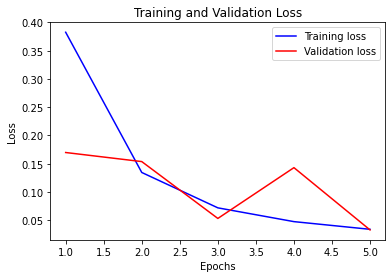

In [188]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

*Ploting Accuracy*

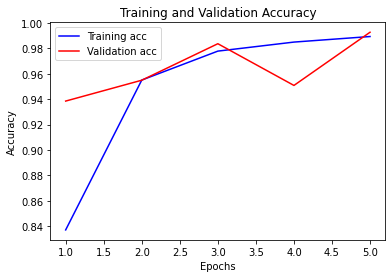

In [189]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

*Testing Model*

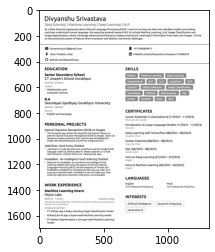

1/1 [==============================] - 0s 82ms/step
[[0.99978733]]
Truth class is Resume
Predicted class is Resume


In [190]:
img = cv2.imread('/Users/divyanshusrivastava/Downloads/ree/Screenshot 2023-12-22 at 7.42.40 PM.png')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (150,150))
yhat = model.predict(np.expand_dims(resize/255, 0))
print(yhat)
print('Truth class is Resume')
if yhat > 0.5: 
    print(f'Predicted class is Resume')
else:
    print(f'Predicted class is Not Resume')

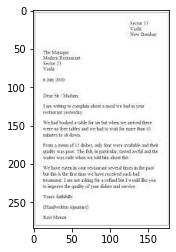

1/1 [==============================] - 0s 19ms/step
[[0.00473368]]
Truth class is Not  Resume
Predicted class is Not Resume


In [191]:
img = cv2.imread('/Users/divyanshusrivastava/Downloads/ree/download.jpeg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (150,150))
yhat = model.predict(np.expand_dims(resize/255, 0))
print(yhat)
print('Truth class is Not  Resume')
if yhat > 0.5: 
    print(f'Predicted class is Resume')
else:
    print(f'Predicted class is Not Resume')

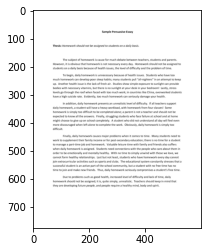

1/1 [==============================] - 0s 19ms/step
[[0.10893295]]
Truth class is Not Resume
Predicted class is Not Resume


In [192]:
img = cv2.imread('/Users/divyanshusrivastava/Downloads/ree/data/not_resume/0HP1Sw6TopQTY4t_h0000002.png')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (150,150))
yhat = model.predict(np.expand_dims(resize/255, 0))
print(yhat)
print('Truth class is Not Resume')
if yhat > 0.5: 
    print(f'Predicted class is Resume')
else:
    print(f'Predicted class is Not Resume')

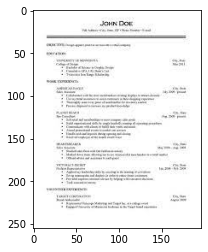

1/1 [==============================] - 0s 24ms/step
[[0.88199633]]
Truth class is Resume
Predicted class is Resume


In [193]:
img = cv2.imread('/Users/divyanshusrivastava/Downloads/ree/reumeee.jpeg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (150,150))
yhat = model.predict(np.expand_dims(resize/255, 0))
print(yhat)
print('Truth class is Resume')
if yhat > 0.5: 
    print(f'Predicted class is Resume')
else:
    print(f'Predicted class is Not Resume')

*Evaluate*

In [194]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [195]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 22ms/step


In [196]:
# Print precision, recall, and accuracy metrics from the evaluation results
# Assuming 'pre', 're', and 'acc' are TensorFlow metrics tracking precision, recall, and accuracy, respectively
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.9602272510528564, Recall:0.9970501661300659, Accuracy:0.9753694534301758


In [198]:
def calculate_f1_score(precision, recall):
    if precision + recall == 0:
        return 0  # To handle the case where both precision and recall are 0
    return 2 * (precision * recall) / (precision + recall)

#calculating f1 socre
precision = 0.96
recall = 0.997

f1_score = calculate_f1_score(precision, recall)
print(f"F1 Score: {f1_score:.2f}")

F1 Score: 0.98
